In [31]:
#importing libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.ticker import FixedLocator
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings('ignore')

In [162]:
# Read the CSV file into pandas DataFrame
df = pd.read_csv('F:/Works/Collaborative Application Development/Updated Data/SRM23_updated.csv')  # Replace with the actual file path
print(df)

       Week  Total_Registered
0    Week 1                 1
1    Week 2                 0
2    Week 3                 1
3    Week 4                 3
4    Week 5               163
5    Week 6                65
6    Week 7                19
7    Week 8                10
8    Week 9                 8
9   Week 10                 5
10  Week 11                 5
11  Week 12                12
12  Week 13                11
13  Week 14                24
14  Week 15                18
15  Week 16                84
16  Week 17               179
17  Week 18                60
18  Week 19                31
19  Week 20                 0
20  Week 21                 0
21  Week 22                27
22  Week 23                21
23  Week 24                 0
24  Week 25                 6


In [165]:
# Ensure 'Week' is treated as a categorical variable
df['Week'] = df['Week'].astype('category')

# Extract 'Total Registered' column
total_registered = df['Total_Registered']

In [166]:
#pvalue> 0.05 -----> not stationary
#Dickey-Fuller Test

adftest = adfuller(total_registered)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.019877511691293273


In [167]:
# Check the length of the total_registered series
len(total_registered)

25

In [172]:
#train-test split
train = total_registered[:17]
test = total_registered[17:]

In [173]:
# Fit ARIMA model to the training data
model = ARIMA(train, order=(7, 1, 1)).fit()

In [174]:
# Print the lengths of the training data and the total_registered series
len(train), len(total_registered-1)

(17, 25)

In [175]:
# Use the trained model to predict future values
pred = model.predict(len(train), len(total_registered)-1)
print(pred)

17    93.669345
18    28.580326
19     1.943409
20    -8.604361
21     5.932387
22    12.999996
23    16.068209
24    36.151309
Name: predicted_mean, dtype: float64


In [176]:
# Calculate the Root Mean Squared Error (RMSE)
error = np.sqrt(mean_squared_error(test, pred))
print(error)

19.014549162449303


In [177]:
# Print the mean and standard deviation of the test set
test.mean(), np.sqrt(test.var())

(18.125, 21.175710478888643)

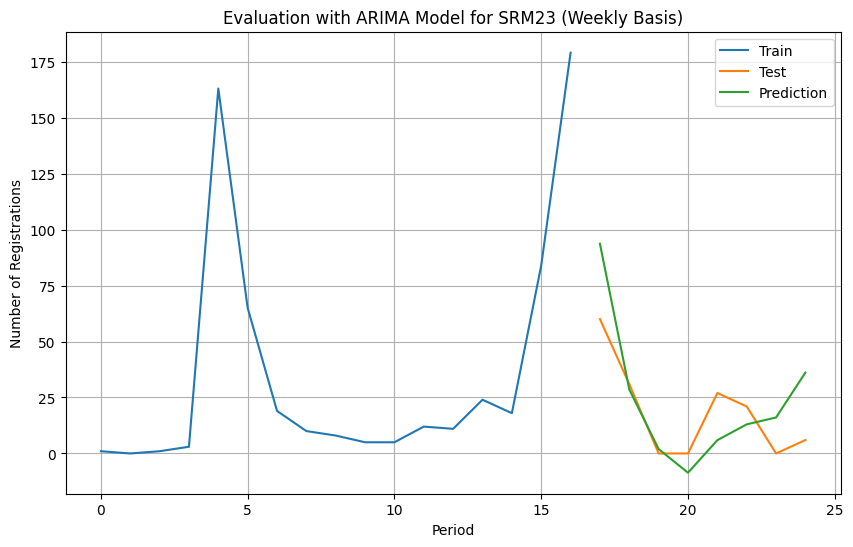

In [178]:
#Plotting the evaluation graph
train.plot(legend = True, label = 'Train', figsize = (10, 6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Evaluation with ARIMA Model for SRM23 (Weekly Basis)')
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Weekly/Training/SRM23_Arima_Weekly.png')

In [179]:
# Train the ARIMA model on the entire dataset
final_model = ARIMA(total_registered, order=(7, 1, 1)).fit()

In [180]:
# Forecast the next 6 Weeks
prediction = final_model.predict(len(total_registered), len(total_registered) + 6)
print(prediction)

25    39.330173
26    60.633967
27    60.661147
28    43.900811
29    32.502875
30    32.784399
31    32.020590
Name: predicted_mean, dtype: float64


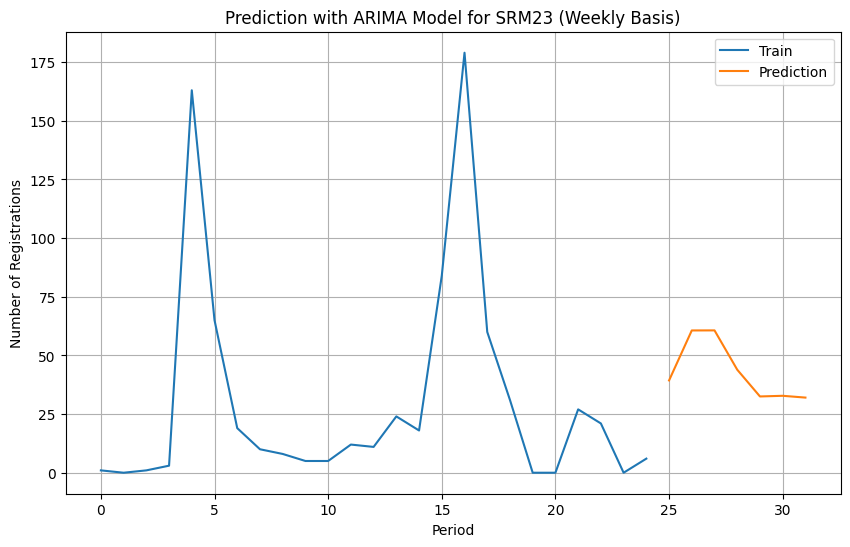

In [181]:
#Plotting the prediction graph
total_registered.plot(legend = True, label = 'Train', figsize = (10, 6))
prediction.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Prediction with ARIMA Model for SRM23 (Weekly Basis)')
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Weekly/Prediction/SRM23_Arima_Weekly.png')

In [ ]:
#..............................................Finding optimal Hyperparameters..................................................#

In [169]:
#finding p,q,d values

p = range(0,8)
q = range(0,8)
d = range(0,2)
pdq_combination = list(itertools.product(p,d,q))
len(pdq_combination)

128

In [170]:
#analysing pdq combination
rmse = []
order1 = []
for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order = pdq).fit()
        pred = model1.predict(len(train), len(total_registered)-1)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        print(f'Error fitting model for parameter {pdq}: {str(e)}')
        continue

In [171]:
#outcome in DataFrame
result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])
#print(result)
print(result.sort_values(by='RMSE'))

                 RMSE
(7, 1, 1)   19.014549
(1, 0, 5)   19.430223
(7, 1, 7)   19.566519
(1, 0, 3)   22.488636
(1, 0, 2)   22.742877
...               ...
(0, 1, 0)  162.089867
(7, 1, 3)  162.089898
(6, 1, 3)  162.089898
(4, 1, 3)  162.089899
(5, 1, 3)  162.089899

[128 rows x 1 columns]
